In [8]:
import xarray as xr
import pandas as pd
import datetime
import numpy as np
import re
import pdb
import sys
import os

In [10]:
# having a look at the original data

In [11]:
cryo_obs="/media/cap/7fed51bd-a88e-4971-9656-d617655b6312/data/CERISE/CRYO_SW"

In [12]:
# Read the data from snow
def get_data_fromtxt(txtFile):
    """
    20221030  6  71.11412  -75.79826  100.00  1
    """
    date = []
    lat     = []
    lon     = []
    snowFrac = []
    f = open(txtFile, 'r')

    for line in f:
        line    = line.strip()
        columns = line.split()
        hour = str(columns[1]).zfill(2)
        date.append(str(columns[0])+hour) #   [str(i)+str(j).zfill(2) for i,j in zip(columns[0],columns[1])]
        lat.append(float(columns[2]))
        lon.append(float(columns[3]))
        snowFrac.append(float(columns[4]))

    f.close()

    return date, lat, lon, snowFrac


In [14]:
snow_file=os.path.join(cryo_obs,"snow_cryo_5-10km_2022100306.dat")
date,lats,lons,snow_prob = get_data_fromtxt(snow_file)

In [16]:
df = pd.DataFrame({"date":date,"lat":lats,"lon":lons,"snow_prob":snow_prob})

<Axes: >

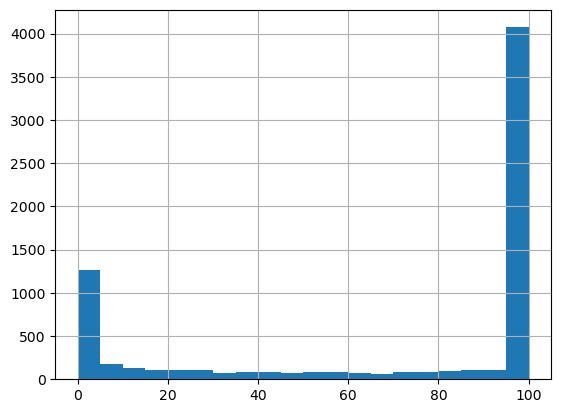

In [39]:
df["snow_prob"].hist(bins=20)

In [30]:
grib_data="/home/cap/Downloads"
grib_data="/media/cap/7fed51bd-a88e-4971-9656-d617655b6312/data/CERISE/MODEL_DATA"
grib_fcst = os.path.join(grib_data,"snow_cover_202210_ll_grid.grib2")
param_fcst="fscov"
fcst = xr.open_dataset(grib_fcst,engine='cfgrib', backend_kwargs={'filter_by_keys':{'shortName': param_fcst}})
#dtime_obs = obs['time'].values
#print(dtime_obs)


(array([ 5313.,  1447.,  2296.,  2726.,  2497.,  3200.,  3310.,  4515.,
         6332., 60663.]),
 array([0.        , 0.09990634, 0.19981268, 0.29971901, 0.39962536,
        0.49953169, 0.59943801, 0.69934434, 0.79925072, 0.89915705,
        0.99906337]),
 <BarContainer object of 10 artists>)

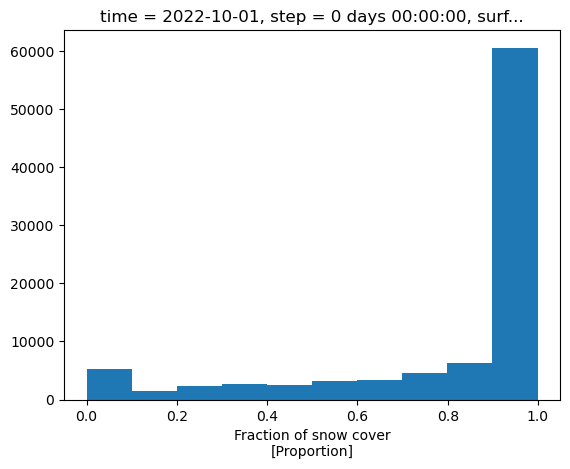

In [35]:
fcst["fscov"][0,:,:].plot.hist()

(array([ 5662.,  1072.,  1835.,  2781.,  2135.,  3009.,  3477.,  4530.,
         6617., 61181.]),
 array([0.        , 0.09990634, 0.19981268, 0.29971904, 0.39962536,
        0.49953172, 0.59943807, 0.6993444 , 0.79925072, 0.89915711,
        0.99906343]),
 <BarContainer object of 10 artists>)

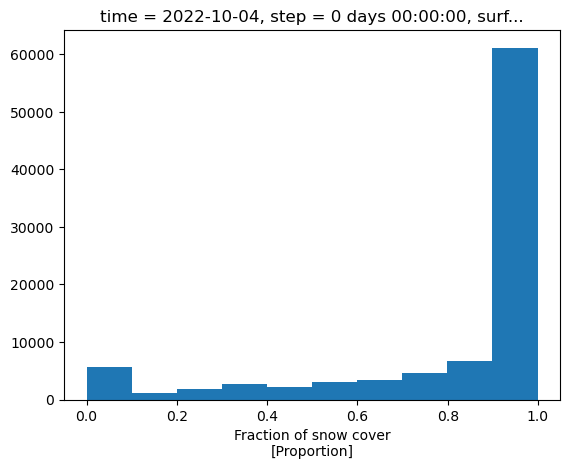

In [38]:
fcst["fscov"][24,:,:].plot.hist()

In [36]:
#mport eccodes as ecc
#file = open(grib_fcst)
#aram_code = 260289
#hile True:
#   msg = ecc.codes_grib_new_from_file(gfile)
#   if msg is None:
#       break
#   key = ecc.codes_get_long(msg,"param")
#   if key == param_code:
#       fcst = ecc.codes_get_values(msg)
#       
#file.close()

array([nan, nan, nan, ..., nan, nan, nan])

ValueError: autodetected range of [nan, nan] is not finite